# Árboles de Decisión
Además de métodos de ensamble

### Librerías a utilizar:

- C50
- caret

### ¿Qué es un aŕbol de decisión?
Segun Breiman et al. (1984): 
- Los árboles de decisión corresponden a un técnica de aprendizaje supervisado. Un árbol de decisión actúa como un modelo débil y su funcionamiento se basa en una secuencia de operadores relacionales (ordenados como árbol).
- Se basa en la estrategia de divide-conquista
- Los nodos hoja están asociados a una clase
- Los nodos no hoja están asociados a un operados lógico de una característica (split)
- Las variables de entrada y salida pueden ser categóricas o continuas.
- Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa.

![arbol](https://bookdown.org/content/2031/images/decision_tree_explanation.png)


### ¿Cómo obtengo esos splits?

Necesitamos saber lo que es entropía e información.... 

![arbol](https://joseantoniomartin.files.wordpress.com/2019/06/que-es-la-entropia.jpg?w=461&h=283)

> Entropía de Shannon: Mide la cantidad de información o incerteza que tenemos sobre una variable aleatoria (VA).

>La teoría de la información es una medida para definir este grado de desorganización en un sistema denominado como Entropía.

La entropía para el lanzamiento de una moneda seria:

$$
H = - p \cdot log(p) - (1 - p) \cdot log(1 - p)
$$

Para un conjunto de datos de $y$ etiquetas y $D$ muestras en el entrenamiento, se define la entropia como:

$$ H(D) = - \sum_{y \in Y} P(y|D) \cdot log P(y|D)$$

Ademas se debe calcular la ganancia de informacion (reduccion de entropia):

$$ G(D; D_1, ..., D_k) = H(D) - \sum^k_{i=1} \frac{|D_i|}{|D|} H(D_k) $$

Entonces:
- Calcule la entropía del nodo padre
- Calcule la entropía de cada nodo individual de la división
- Calcule el promedio ponderado de todos los subnodos disponibles en la división.


### ¿Cuando se detiene el algoritmo del árbol de decisión?
- Nodos puros
- Profundidad indicada por el usuario; mientras más profundo es el árbol mayor es su complejidad

In [27]:
library("C50")
library("caret")
library("ggpubr")

In [9]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

In [11]:
training.index = createDataPartition(seeds$class, p=0.7)$Resample1
training.set = seeds[training.index, ]
test.set = seeds[-training.index, ]

In [13]:
head(training.set)

,area,perimeter,compactness,length,width,AC,lengthGroove,class
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
7,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama
8,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,Kama


In [14]:
head(test.set)

,area,perimeter,compactness,length,width,AC,lengthGroove,class
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
6,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
9,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,Kama
12,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama
14,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,Kama
18,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,Kama


In [15]:
tree = C5.0(class ~ ., training.set)
tree.rules = C5.0(x = training.set[, -8], y = training.set$class, rules = T)
tree.pred.class = predict(tree, test.set[,-8], type = "class")
tree.pred.prob = predict(tree, test.set[,-8], type = "prob")

In [16]:
tree.pred.class

[1] Kama     Kama     Rosa     Kama     Kama     Kama     Canadian Kama    
 [9] Kama     Canadian Kama     Kama     Kama     Kama     Kama     Kama    
[17] Kama     Kama     Kama     Canadian Kama     Rosa     Rosa     Rosa    
[25] Rosa     Rosa     Rosa     Rosa     Rosa     Rosa     Rosa     Rosa    
[33] Rosa     Rosa     Rosa     Rosa     Kama     Rosa     Rosa     Rosa    
[41] Rosa     Rosa     Canadian Canadian Canadian Canadian Canadian Canadian
[49] Canadian Canadian Canadian Canadian Canadian Canadian Canadian Canadian
[57] Canadian Canadian Canadian Canadian Canadian Canadian Canadian
Levels: Kama Rosa Canadian

In [17]:
head(tree.pred.prob)

,Kama,Rosa,Canadian
2,0.958333333,0.03333333,0.008333334
6,0.958333333,0.03333333,0.008333334
9,0.006802721,0.98639456,0.006802721
12,0.958333333,0.03333333,0.008333334
14,0.958333333,0.03333333,0.008333334
18,0.958333333,0.03333333,0.008333334



Call:
C5.0.formula(formula = class ~ ., data = training.set)


C5.0 [Release 2.07 GPL Edition]  	Thu Jan  7 23:11:47 2021
-------------------------------

Class specified by attribute `outcome'

Read 147 cases (8 attributes) from undefined.data

Decision tree:

lengthGroove > 5.533: Rosa (48)
lengthGroove <= 5.533:
:...area > 13.37: Kama (39/1)
    area <= 13.37:
    :...AC > 3.533: Canadian (44/1)
        AC <= 3.533:
        :...lengthGroove <= 4.703: Kama (5)
            lengthGroove > 4.703:
            :...area <= 12.89: Canadian (8/2)
                area > 12.89: Kama (3)


Evaluation on training data (147 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    46           3    (a): class Kama
	     1    48          (b): class Rosa
	                49    (c): class Canadian


	Attribute usage:

	100.00%	lengthGroove
	 67.35%	area
	 40.82%	AC


Time: 0.0 secs


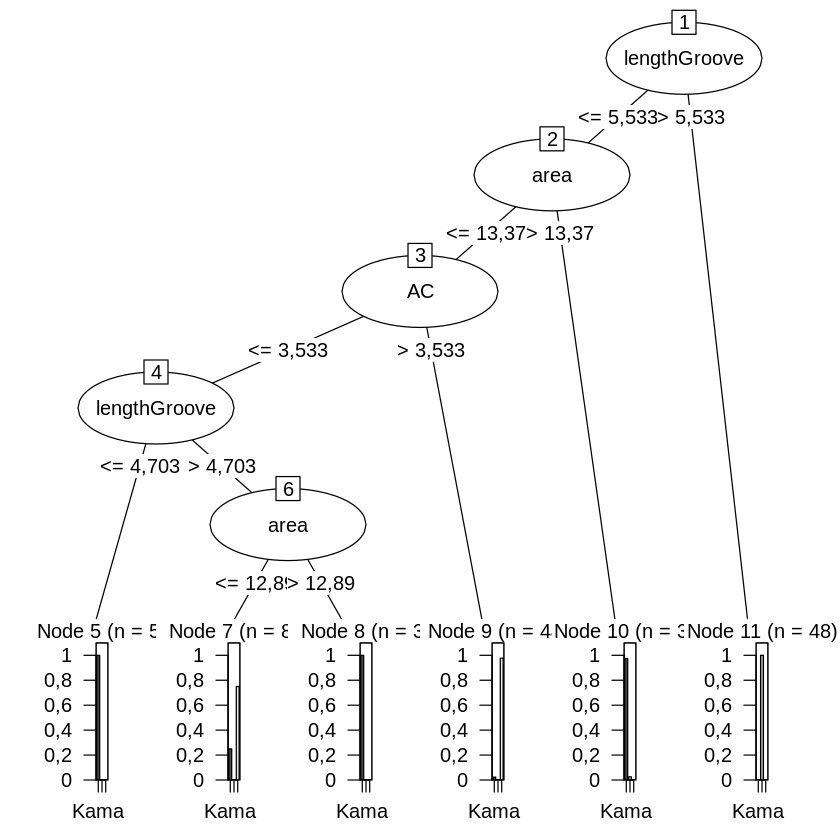

In [18]:
plot(tree)
summary(tree)

In [19]:
summary(tree.rules)


Call:
C5.0.default(x = training.set[, -8], y = training.set$class, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Thu Jan  7 23:11:47 2021
-------------------------------

Class specified by attribute `outcome'

Read 147 cases (8 attributes) from undefined.data

Rules:

Rule 1: (31, lift 2.9)
	area > 12.89
	AC <= 3.533
	lengthGroove <= 5.533
	->  class Kama  [0.970]

Rule 2: (39/1, lift 2.9)
	area > 13.37
	lengthGroove <= 5.533
	->  class Kama  [0.951]

Rule 3: (6, lift 2.6)
	lengthGroove <= 4.703
	->  class Kama  [0.875]

Rule 4: (48, lift 2.9)
	lengthGroove > 5.533
	->  class Rosa  [0.980]

Rule 5: (44/1, lift 2.9)
	area <= 13.37
	AC > 3.533
	->  class Canadian  [0.957]

Rule 6: (46/2, lift 2.8)
	area <= 12.89
	lengthGroove > 4.703
	->  class Canadian  [0.938]

Default class: Kama


Evaluation on training data (147 cases):

	        Rules     
	  ----------------
	    No      Errors

	     6    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    46       

In [20]:
conf.matrix.tree = confusionMatrix(table(test.set$class, tree.pred.class))
print(conf.matrix.tree)

Confusion Matrix and Statistics

          tree.pred.class
           Kama Rosa Canadian
  Kama       17    1        3
  Rosa        1   20        0
  Canadian    0    0       21

Overall Statistics
                                          
               Accuracy : 0,9206          
                 95% CI : (0,8244, 0,9737)
    No Information Rate : 0,381           
    P-Value [Acc > NIR] : < 2,2e-16       
                                          
                  Kappa : 0,881           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Kama Class: Rosa Class: Canadian
Sensitivity               0,9444      0,9524          0,8750
Specificity               0,9111      0,9762          1,0000
Pos Pred Value            0,8095      0,9524          1,0000
Neg Pred Value            0,9762      0,9762          0,9286
Prevalence                0,2857      0,3333          0,3810
Detection Rate           

# ¿Cómo mejoro los resultados?
- Mejorar training set (remuestreo, SMOTE, etc)
- Ensambles (bagging, boosting)
- Tener árboles con distintas características (después jugar)

Spoiler: La combinacion de algunas cosas de arriba provocan un random forest

In [21]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [36]:
rf = randomForest(class~ ., data=training.set, ntree = 500, importance=TRUE, proximity=TRUE, ntry=10)
rf.pred.class = predict(rf, test.set[,-8], type = "class")

In [37]:
conf.matrix.rf = confusionMatrix(table(test.set$class, rf.pred.class))
print(conf.matrix.rf)

Confusion Matrix and Statistics

          rf.pred.class
           Kama Rosa Canadian
  Kama       19    1        1
  Rosa        1   20        0
  Canadian    1    0       20

Overall Statistics
                                          
               Accuracy : 0,9365          
                 95% CI : (0,8453, 0,9824)
    No Information Rate : 0,3333          
    P-Value [Acc > NIR] : < 2,2e-16       
                                          
                  Kappa : 0,9048          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Kama Class: Rosa Class: Canadian
Sensitivity               0,9048      0,9524          0,9524
Specificity               0,9524      0,9762          0,9762
Pos Pred Value            0,9048      0,9524          0,9524
Neg Pred Value            0,9524      0,9762          0,9762
Prevalence                0,3333      0,3333          0,3333
Detection Rate            0

In [38]:
summary(rf)

                Length Class  Mode     
call                7  -none- call     
type                1  -none- character
predicted         147  factor numeric  
err.rate         2000  -none- numeric  
confusion          12  -none- numeric  
votes             441  matrix numeric  
oob.times         147  -none- numeric  
classes             3  -none- character
importance         35  -none- numeric  
importanceSD       28  -none- numeric  
localImportance     0  -none- NULL     
proximity       21609  -none- numeric  
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                 147  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [39]:
rf$importance

,Kama,Rosa,Canadian,MeanDecreaseAccuracy,MeanDecreaseGini
area,"0,08185194","0,1148781094","0,22806669","0,13877544","19,420772"
perimeter,"0,08695331","0,1122676574","0,16753571","0,12071852","18,099480"
compactness,"0,01448894","-0,0015569208","0,04945022","0,02087637","6,377658"
length,"0,03121575","0,0621816020","0,07407897","0,05518270","10,504143"
width,"0,03185038","0,0307906363","0,11118415","0,05856749","10,663223"
AC,"0,04147445","-0,0002716864","0,12213529","0,05339700","9,613031"
lengthGroove,"0,17098051","0,3190636692","0,10166572","0,19487810","22,659244"


In [44]:
ggbarplot(x = rf$importance$Kama, y = rownames(rf$importance))

ERROR: Error in rf$importance$Kama: $ operator is invalid for atomic vectors


In [43]:
rownames(rf$importance)

[1] "area"         "perimeter"    "compactness"  "length"       "width"       
[6] "AC"           "lengthGroove"

In [48]:
rf$importanceSD

,Kama,Rosa,Canadian,MeanDecreaseAccuracy
area,"0,006675070","0,0094690674","0,011048611","0,006290825"
perimeter,"0,006451892","0,0093036979","0,009103773","0,005928605"
compactness,"0,003091819","0,0010347380","0,004479563","0,001908236"
length,"0,004224127","0,0074180292","0,006582294","0,004324065"
width,"0,004188964","0,0048268424","0,008513153","0,003981251"
AC,"0,003272295","0,0009974916","0,006171703","0,002549760"
lengthGroove,"0,006253196","0,0140417048","0,006822350","0,007417937"


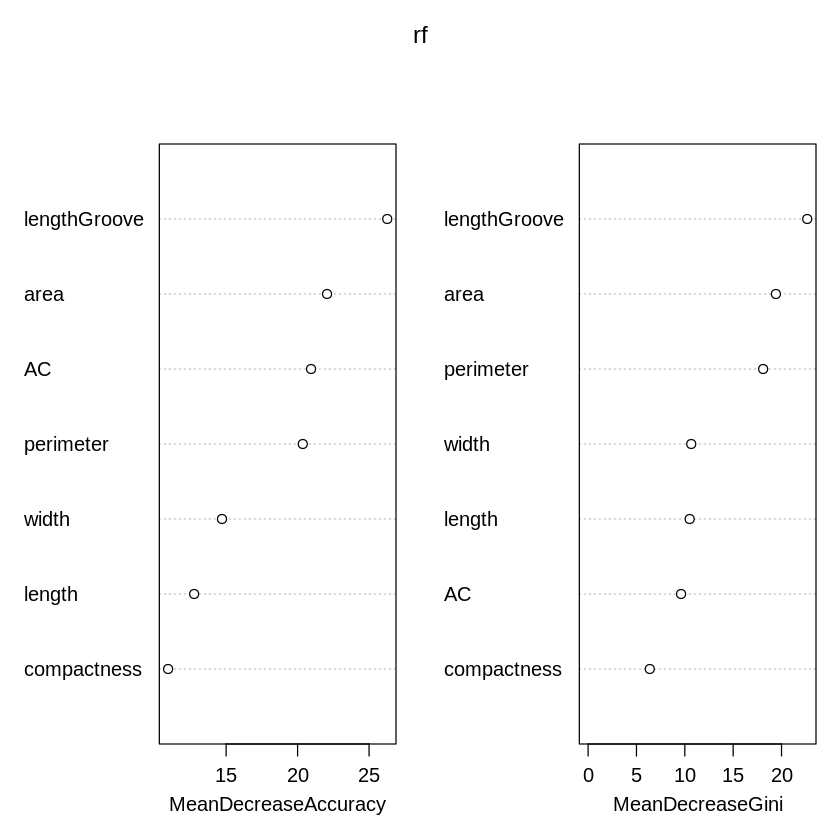

In [55]:
varImpPlot(rf)